In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [2]:
df=pd.read_csv('SupplyChainData.csv', encoding='latin1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [3]:
df.columns

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

deleting duplicate and not reated features

In [4]:
data=df.copy()

In [5]:
FeatureList=['Type', 'Benefit per order', 'Sales per customer', 
          'Delivery Status', 'Late_delivery_risk', 'Category Name', 'Customer City', 'Customer Country', 
           'Customer Id', 'Customer Segment', 
          'Customer State', 'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
          'Market', 'Order City', 'Order Country', 'Order Customer Id', 'order date (DateOrders)', 'Order Id', 
          'Order Item Cardprod Id', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id', 
          'Order Item Product Price', 'Order Item Profit Ratio', 'Order Item Quantity', 'Sales', 'Order Item Total', 
          'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status', 'Order Zipcode', 'Product Card Id',
          'Product Category Id', 'Product Description', 'Product Image', 'Product Name', 'Product Price', 'Product Status',
       'shipping date (DateOrders)', 'Shipping Mode']

df1=df[FeatureList]
df1.head()

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,-247.779999,309.720001,Shipping on time,0,Sporting Goods,San Jose,EE. UU.,19491,Consumer,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,22.860001,304.809998,Advance shipping,0,Sporting Goods,Los Angeles,EE. UU.,19490,Home Office,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,134.210007,298.250000,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,19489,Corporate,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


# Data Visualization

# Delivery status

In [6]:
data_delivery_status=df1.groupby(['Delivery Status'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(x=data_delivery_status['Delivery Status'] , y=data_delivery_status['Number of Orders']  , color=data_delivery_status['Number of Orders'],
      labels = { 'Delivery Status': 'Delivery Status', 'Number of Orders': 'Number of Orders'})

In [7]:
data_delivery_status_region=df1.groupby(['Delivery Status', 'Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_delivery_status_region, x='Delivery Status', y='Number of Orders'  , color='Order Region',
      )

Central America and Western Europe have the most lated delivered Orders

# Top 20 Customers regarding the quantity of orders

In [8]:
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers=df1.groupby(['Customer_ID_STR'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.bar(data_customers.head(20),x='Number of Orders', y='Customer_ID_STR' , color='Number of Orders'      )

C:\Users\Mujahid\AppData\Local\Temp\ipykernel_12316\1113062083.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Top 20 Customers regarding profit of all orders

In [9]:
df1['Customer_ID_STR']=df1['Customer Id'].astype(str)

data_customers_profit=df1.groupby(['Customer_ID_STR'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)
px.bar(data_customers_profit.head(20),x='Profit of Orders', y='Customer_ID_STR' , color='Profit of Orders'      )

C:\Users\Mujahid\AppData\Local\Temp\ipykernel_12316\34035558.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Customer Segment

In [10]:
#Customer Segments
data_Customer_Segment=df1.groupby(['Customer Segment'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= False)
px.pie(data_Customer_Segment, values='Number of Orders', names= 'Customer Segment' , title= 'Number of Orders of different Customer Segments', 
       width=600 , height=600 , color_discrete_sequence = px.colors.sequential.RdBu)

# Category

In [11]:
#Category Name
data_Category_Name=df1.groupby(['Category Name'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Category_Name, x='Number of Orders',y = 'Category Name',color ='Number of Orders')



# Based on Region

In [12]:
data_Region=df1.groupby(['Order Region'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_Region, x='Number of Orders',y = 'Order Region',color ='Number of Orders')



In [13]:
data_countries=df1.groupby(['Order Country'])['Order Id'].count().reset_index(name='Number of Orders').sort_values(by= 'Number of Orders', ascending= True)
px.bar(data_countries.head(20), x='Number of Orders',y = 'Order Country',color ='Number of Orders')


In [14]:

df_geo=df1.groupby([ 'Order Country', 'Order City'])['Order Profit Per Order'].sum().reset_index(name='Profit of Orders').sort_values(by= 'Profit of Orders', ascending= False)

df_geo

,Order Country,Order City,Profit of Orders
3260,República Dominicana,Santo Domingo,51111.670019
1492,Estados Unidos,New York City,47889.759868
2152,Honduras,Tegucigalpa,40973.640056
1430,Estados Unidos,Los Angeles,38014.360024
2837,Nicaragua,Managua,34319.950107
...,...,...,...
738,China,Dalian,-1588.609972
3,Afganistán,Kandahar,-1681.830001
3110,Reino Unido,Dudley,-1742.079996
2463,Italia,Cerignola,-2212.530012


In [15]:
fig = px.choropleth(df_geo ,  locationmode='country names', locations='Order Country',
                    color='Profit of Orders',
                    hover_name='Order Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

# Sales Analysis

In [16]:
#Order Country
df_sales_country=df1.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')

In [17]:
#Order Country
df_sales_country=df1.groupby([ 'Order Country'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Order Country',color ='Sales of Orders')


In [18]:
#Product
df_sales_country=df1.groupby([ 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_country.head(10), x='Sales of Orders',y = 'Product Name',color ='Sales of Orders')


In [19]:
#Product and delivery status
df_sales_pd=df1.groupby([ 'Product Name', 'Delivery Status'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pd.head(10), x='Sales of Orders',y = 'Product Name',color ='Delivery Status')


In [20]:
#Product and order region
df_sales_pr=df1.groupby([ 'Product Name', 'Order Region'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Product Name',color ='Order Region')


In [21]:
#Category Name
df_sales_pr=df1.groupby([  'Category Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Category Name',color ='Sales of Orders')


In [22]:
#Type of payment
df_sales_pr=df1.groupby([ 'Type'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_pr.head(10), x='Sales of Orders',y = 'Type',color ='Sales of Orders')


In [23]:
df_sales_tp=df1.groupby([ 'Type', 'Product Name'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_tp.head(10), x='Sales of Orders',y = 'Type',color ='Product Name')


# Date and sales analysis

In [24]:
import datetime as dt

data_orderdate=df[['order date (DateOrders)', 'Sales']]
data_orderdate['order_date'] = pd.to_datetime(data_orderdate['order date (DateOrders)'])

C:\Users\Mujahid\AppData\Local\Temp\ipykernel_12316\1806371535.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
data_orderdate["Quarter"] = data_orderdate['order_date'].dt.quarter
data_orderdate["Month"] = data_orderdate['order_date'].dt.month
data_orderdate["year"] = data_orderdate['order_date'].dt.year

C:\Users\Mujahid\AppData\Local\Temp\ipykernel_12316\3482627655.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mujahid\AppData\Local\Temp\ipykernel_12316\3482627655.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Mujahid\AppData\Local\Temp\ipykernel_12316\3482627655.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [26]:
data_orderdate['YearStr']=data_orderdate['year'].astype(str)
df_sales_year=data_orderdate.groupby([ 'YearStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_year, x='Sales of Orders',y = 'YearStr',color ='Sales of Orders')


C:\Users\Mujahid\AppData\Local\Temp\ipykernel_12316\2785508228.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
data_orderdate['QuarterStr']=data_orderdate['Quarter'].astype(str)
df_sales_quarter=data_orderdate.groupby([ 'YearStr','QuarterStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_quarter, x='Sales of Orders',y = 'QuarterStr',color ='YearStr')

C:\Users\Mujahid\AppData\Local\Temp\ipykernel_12316\1609770672.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [28]:
data_orderdate['MonthStr']=data_orderdate['Month'].astype(str)
df_sales_m=data_orderdate.groupby([ 'QuarterStr', 'MonthStr'])['Sales'].sum().reset_index(name='Sales of Orders').sort_values(by= 'Sales of Orders', ascending= False)
px.bar(df_sales_m, x='Sales of Orders',y = 'QuarterStr',color ='MonthStr')


C:\Users\Mujahid\AppData\Local\Temp\ipykernel_12316\3888878285.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Forecasting

Predicting if an order is fraud or not

In [29]:
data=df1.copy()

In [30]:
data['SUSPECTED_FRAUD'] = np.where(data['Order Status'] == 'SUSPECTED_FRAUD', 1, 0)

In [31]:
data.head(2)

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR,SUSPECTED_FRAUD
0,DEBIT,91.250000,314.640015,Advance shipping,0,Sporting Goods,Caguas,Puerto Rico,20755,Consumer,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,02-03-2018 22:56,Standard Class,20755,0
1,TRANSFER,-249.089996,311.359985,Late delivery,1,Sporting Goods,Caguas,Puerto Rico,19492,Consumer,...,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class,19492,0


In [32]:
data.columns

Index(['Type', 'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Id', 'Customer Segment', 'Customer State',
       'Customer Zipcode', 'Department Name', 'Latitude', 'Longitude',
       'Market', 'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product Description', 'Product Image', 'Product Name', 'Product Price',
       'Product Status', 'shipping date (DateOrders)', 'Shipping Mode',
       'Customer_ID_STR', 'SUSPECTED_FRAUD'],
      dtype='object')

In [33]:
data['SUSPECTED_FRAUD'].value_counts()

0    176457
1      4062
Name: SUSPECTED_FRAUD, dtype: int64

In [34]:
data['Late_delivery_risk'].value_counts()

1    98977
0    81542
Name: Late_delivery_risk, dtype: int64

In [35]:
data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
SUSPECTED_FRAUD     4062
CANCELED            3692
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [36]:
data.isnull().sum()/len(data) * 100

Type                            0.000000
Benefit per order               0.000000
Sales per customer              0.000000
Delivery Status                 0.000000
Late_delivery_risk              0.000000
Category Name                   0.000000
Customer City                   0.000000
Customer Country                0.000000
Customer Id                     0.000000
Customer Segment                0.000000
Customer State                  0.000000
Customer Zipcode                0.001662
Department Name                 0.000000
Latitude                        0.000000
Longitude                       0.000000
Market                          0.000000
Order City                      0.000000
Order Country                   0.000000
Order Customer Id               0.000000
order date (DateOrders)         0.000000
Order Id                        0.000000
Order Item Cardprod Id          0.000000
Order Item Discount             0.000000
Order Item Discount Rate        0.000000
Order Item Id   

In [37]:
data.drop(['Product Description', 'Order Zipcode','Customer Zipcode','Order Zipcode'], axis=1, inplace=True)

In [38]:
data.shape

(180519, 43)

In [39]:
data['SUSPECTED_FRAUD'].value_counts()

0    176457
1      4062
Name: SUSPECTED_FRAUD, dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Type                        180519 non-null  object 
 1   Benefit per order           180519 non-null  float64
 2   Sales per customer          180519 non-null  float64
 3   Delivery Status             180519 non-null  object 
 4   Late_delivery_risk          180519 non-null  int64  
 5   Category Name               180519 non-null  object 
 6   Customer City               180519 non-null  object 
 7   Customer Country            180519 non-null  object 
 8   Customer Id                 180519 non-null  int64  
 9   Customer Segment            180519 non-null  object 
 10  Customer State              180519 non-null  object 
 11  Department Name             180519 non-null  object 
 12  Latitude                    180519 non-null  float64
 13  Longitude     

In [41]:
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
le = LabelEncoder()

# Encoding all object type columns
for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])


In [42]:
data.head(2)

,Type,Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Name,Customer City,Customer Country,Customer Id,Customer Segment,...,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode,Customer_ID_STR,SUSPECTED_FRAUD
0,1,91.250000,314.640015,0,0,40,66,1,20755,0,...,1360,73,78,78,327.75,0,3250,3,11912,0
1,3,-249.089996,311.359985,1,1,40,66,1,19492,0,...,1360,73,78,78,327.75,0,20134,3,10509,0


In [43]:
# X contains all columns except "SUSPECTED_FRAUD"
X = data.drop("SUSPECTED_FRAUD", axis=1)

# y contains only "SUSPECTED_FRAUD"
y = data["SUSPECTED_FRAUD"]


In [44]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 43 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Type                        180519 non-null  int32  
 1   Benefit per order           180519 non-null  float64
 2   Sales per customer          180519 non-null  float64
 3   Delivery Status             180519 non-null  int32  
 4   Late_delivery_risk          180519 non-null  int64  
 5   Category Name               180519 non-null  int32  
 6   Customer City               180519 non-null  int32  
 7   Customer Country            180519 non-null  int32  
 8   Customer Id                 180519 non-null  int64  
 9   Customer Segment            180519 non-null  int32  
 10  Customer State              180519 non-null  int32  
 11  Department Name             180519 non-null  int32  
 12  Latitude                    180519 non-null  float64
 13  Longitude     

# Performing Dimensionality Reduction using PCA

In [46]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



In [47]:
for i in range(pca.n_components_):
    pc = pca.components_[i]

    top_vars = pc.argsort()[::-1][:10]

    feature_names = X_train.columns
    top_vars_names = feature_names[top_vars]

    print("Top variables contributing to principal component", i+1, ":")
    print(top_vars_names)


Top variables contributing to principal component 1 :
Index(['Customer_ID_STR', 'Order City', 'Order State', 'Product Name',
       'Product Image', 'Customer City', 'Order Item Quantity', 'Market',
       'Latitude', 'Shipping Mode'],
      dtype='object')
Top variables contributing to principal component 2 :
Index(['Order Item Id', 'Order Id', 'Customer Id', 'Order Customer Id',
       'Product Card Id', 'Order Item Cardprod Id', 'Order State',
       'Order City', 'Order Item Product Price', 'Product Price'],
      dtype='object')
Top variables contributing to principal component 3 :
Index(['order date (DateOrders)', 'Customer Id', 'Order Customer Id',
       'Customer_ID_STR', 'Customer City', 'Sales', 'Sales per customer',
       'Order Item Total', 'Order Item Product Price', 'Product Price'],
      dtype='object')
Top variables contributing to principal component 4 :
Index(['Customer Id', 'Order Customer Id', 'Order Id',
       'shipping date (DateOrders)', 'order date (DateOrde

In [48]:
explained_variances = pca.explained_variance_ratio_

for i in range(pca.n_components_):
    print(f"Variance explained by PC{i+1}: {explained_variances[i]*100:.2f}%")


Variance explained by PC1: 79.69%
Variance explained by PC2: 14.85%
Variance explained by PC3: 3.48%
Variance explained by PC4: 1.26%
Variance explained by PC5: 0.67%
Variance explained by PC6: 0.03%
Variance explained by PC7: 0.01%
Variance explained by PC8: 0.00%
Variance explained by PC9: 0.00%
Variance explained by PC10: 0.00%


In [49]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



In [50]:
for i in range(pca.n_components_):
    pc = pca.components_[i]

    top_vars = pc.argsort()[::-1][:10]

    feature_names = X_train.columns
    top_vars_names = feature_names[top_vars]

    print("Top variables contributing to principal component", i+1, ":")
    print(top_vars_names)


Top variables contributing to principal component 1 :
Index(['Customer_ID_STR', 'Order City', 'Order State', 'Product Name',
       'Product Image', 'Customer City', 'Order Item Quantity', 'Market',
       'Latitude', 'Shipping Mode'],
      dtype='object')
Top variables contributing to principal component 2 :
Index(['Order Item Id', 'Order Id', 'Customer Id', 'Order Customer Id',
       'Product Card Id', 'Order Item Cardprod Id', 'Order State',
       'Order City', 'Product Price', 'Order Item Product Price'],
      dtype='object')
Top variables contributing to principal component 3 :
Index(['order date (DateOrders)', 'Customer Id', 'Order Customer Id',
       'Customer_ID_STR', 'Customer City', 'Sales', 'Order Item Total',
       'Sales per customer', 'Product Price', 'Order Item Product Price'],
      dtype='object')
Top variables contributing to principal component 4 :
Index(['Customer Id', 'Order Customer Id', 'Order Id',
       'shipping date (DateOrders)', 'order date (DateOrde

In [51]:
explained_variances = pca.explained_variance_ratio_

for i in range(pca.n_components_):
    print(f"Variance explained by PC{i+1}: {explained_variances[i]*100:.2f}%")


Variance explained by PC1: 79.69%
Variance explained by PC2: 14.85%
Variance explained by PC3: 3.48%
Variance explained by PC4: 1.26%


In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [53]:
# Create a list of classification algorithms
algorithms = [('Logistic Regression', LogisticRegression(class_weight = 'balanced')),
              ('Decision Tree', DecisionTreeClassifier(class_weight = 'balanced')),
              ('Random Forest', RandomForestClassifier(class_weight = 'balanced'))
             ]


In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

In [55]:
results = []

for name, model in algorithms:
    # Fitting the model
    model.fit(X_train_pca, y_train)
    
    # Predicting the labels for the test data and calculate the evaluation metrics
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Calculating the AUC value
    y_proba = model.predict_proba(X_test_pca)[:,1]
    auc = roc_auc_score(y_test, y_proba)
    
    # Adding the results to the list
    results.append((name, accuracy, precision, recall, f1, auc))


In [56]:
df_results = pd.DataFrame(results, columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC'])
print(df_results)

             Algorithm  Accuracy  Precision    Recall  F1 Score       AUC
0  Logistic Regression  0.632949   0.022486  0.343529  0.042209  0.489440
1        Decision Tree  0.989807   0.817105  0.730588  0.771429  0.863323
2        Random Forest  0.994073   0.989231  0.756471  0.857333  0.928924


# AutoEDA and AutoML

## If client asks me the work need to be excecuted as soon as possible, I would rather opt for AutoEDA and AutoML Libraries which will eventually save company's time and give out the best results possible

In [57]:
import pandas_profiling

C:\Users\Mujahid\AppData\Local\Temp\ipykernel_12316\1591302161.py:1: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



In [58]:
profile = pandas_profiling.ProfileReport(data)

In [59]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [60]:
from pycaret.classification import *

In [61]:
clf = setup(data, target='SUSPECTED_FRAUD', fix_imbalance = True)

,Description,Value
0,Session id,8386
1,Target,SUSPECTED_FRAUD
2,Target type,Binary
3,Original data shape,"(180519, 43)"
4,Transformed data shape,"(301196, 43)"
5,Transformed train set shape,"(247040, 43)"
6,Transformed test set shape,"(54156, 43)"
7,Numeric features,42
8,Preprocess,True
9,Imputation type,simple


In [62]:
best_model = compare_models(fold=5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,3.3120
rf,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,18.4860
ada,Ada Boost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,2.1700
gbc,Gradient Boosting Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,50.1860
et,Extra Trees Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,8.7260
xgboost,Extreme Gradient Boosting,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,15.9720
lightgbm,Light Gradient Boosting Machine,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,4.6740
catboost,CatBoost Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,57.5140
qda,Quadratic Discriminant Analysis,0.9998,1.0000,0.9923,1.0000,0.9961,0.9960,0.9960,2.2040
dummy,Dummy Classifier,0.9775,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.6200


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [63]:
tuned_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


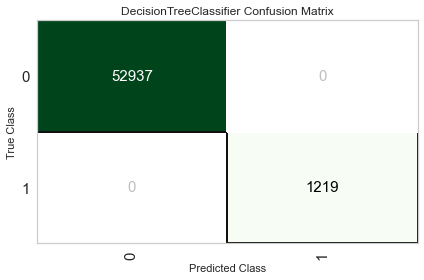

In [64]:
plot_model(tuned_model, plot='confusion_matrix')